# Fine-tuning keras models

Learn how to optimize your deep learning models in Keras. Start by learning how to validate your models, then understand the concept of model capacity, and finally, experiment with wider and deeper networks.

## Understanding model optimization

Stochastic Gradient Descent, sometimes abbreviated to SGD.This optimizer uses a fixed learning rate. Learning rates around 0.01 are common. But you can specify the learning rate you need with lr argument

### Diagnosing optimization problems

The following could prevent a model from showing an improved loss in its first few epochs?

* Learning rate too low.
* Learning rate too high.
* Poor choice of activation function
All the options listed could prevent a model from showing an improved loss in its first few epochs.'

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [2]:
df=pd.read_csv("titanic_all_numeric.csv")
predictors=df.drop(['survived'],axis=1).astype(np.float32).to_numpy()
target=df.survived.astype(np.float32).to_numpy()
# Convert the target to categorical: target
target=to_categorical(df.survived)
n_cols=predictors.shape[1]

### Changing optimization parameters

It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

In [5]:
def get_new_model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
    #model.add(Dense(100, activation='relu'))
    model.add(Dense(2,activation='softmax'))
    return(model)

**Instructions**

* Import SGD from keras.optimizers.
* Create a list of learning rates to try optimizing with called lr_to_test. The learning rates in it should be .000001, 0.01, and 1.
* Using a for loop to iterate over lr_to_test:
    * Use the get_new_model() function to build a new, unoptimized model.
    * Create an optimizer called my_optimizer using the SGD() constructor with keyword argument lr=lr.
* Compile your model. Set the optimizer parameter to be the SGD object you created above, and because this is a classification problem, use 'categorical_crossentropy' for the loss parameter.
* Fit your model using the predictors and target.

In [6]:
# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer,loss='categorical_crossentropy' )
    
    # Fit the model
    model.fit(predictors,target,epochs=10)



Testing model with learning rate: 0.000001



C:\Users\aduzo\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
28/28 [==============================] - 2s 3ms/step - loss: 2.5913
Epoch 2/10
28/28 [==============================] - 0s 4ms/step - loss: 2.5710
Epoch 3/10
28/28 [==============================] - 0s 3ms/step - loss: 2.5507
Epoch 4/10
28/28 [==============================] - 0s 4ms/step - loss: 2.5307
Epoch 5/10
28/28 [==============================] - 0s 5ms/step - loss: 2.5109
Epoch 6/10
28/28 [==============================] - 0s 4ms/step - loss: 2.4913
Epoch 7/10
28/28 [==============================] - 0s 4ms/step - loss: 2.4719
Epoch 8/10
28/28 [==============================] - 0s 3ms/step - loss: 2.4526
Epoch 9/10
28/28 [==============================] - 0s 3ms/step - loss: 2.4336
Epoch 10/10
28/28 [==============================] - 0s 6ms/step - loss: 2.4147


Testing model with learning rate: 0.010000

Epoch 1/10
28/28 [==============================] - 1s 3ms/step - loss: 3.7663
Epoch 2/10
28/28 [==============================] - 0s 4ms/step - loss: 0.8672
Epoch

## Model validation

Using Validation data to test for model peformance.

**Early Stopping**

Helps to stop training when validation score is not improving.
patience argument is how many epochs the model can go without improving before we stop training. 2 or 3 are reasonable values for patience. 

inside the fit function, callbacks takes a list.

by default 10 epochs
nb_epoch = max epoch

### Evaluating model accuracy on validation dataset

Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

**Instructions**

* Compile your model using 'adam' as the optimizer and 'categorical_crossentropy' for the loss. To see what fraction of predictions are correct (the accuracy) in each epoch, specify the additional keyword argument metrics=['accuracy'] in model.compile().
* Fit the model using the predictors and target. Create a validation split of 30% (or 0.3). This will be reported in each epoch.

In [9]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors,target,validation_split=0.3,epochs=10)

Epoch 1/10
20/20 [==============================] - 3s 58ms/step - loss: 0.9346 - accuracy: 0.6116 - val_loss: 0.6410 - val_accuracy: 0.6007
Epoch 2/10
20/20 [==============================] - 0s 11ms/step - loss: 0.6443 - accuracy: 0.6693 - val_loss: 0.6636 - val_accuracy: 0.6903
Epoch 3/10
20/20 [==============================] - 0s 14ms/step - loss: 0.6110 - accuracy: 0.6758 - val_loss: 0.5143 - val_accuracy: 0.7687
Epoch 4/10
20/20 [==============================] - 0s 18ms/step - loss: 0.6432 - accuracy: 0.6709 - val_loss: 0.5415 - val_accuracy: 0.7463
Epoch 5/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6143 - accuracy: 0.6950 - val_loss: 0.4909 - val_accuracy: 0.7575
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5925 - accuracy: 0.7095 - val_loss: 0.4889 - val_accuracy: 0.7687
Epoch 7/10
20/20 [==============================] - 0s 14ms/step - loss: 0.5623 - accuracy: 0.7416 - val_loss: 0.5371 - val_accuracy: 0.7724
Epoch 8/10
20

### Early stopping: Optimizing the optimization

Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.

**Instructions**

* Import EarlyStopping from keras.callbacks.
* Compile the model, once again using 'adam' as the optimizer, 'categorical_crossentropy' as the loss function, and metrics=['accuracy'] to see the accuracy at each epoch.
* Create an EarlyStopping object called early_stopping_monitor. Stop optimization when the validation loss hasn't improved for 2 epochs by specifying the patience parameter of EarlyStopping() to be 2.
* Fit the model using the predictors and target. Specify the number of epochs to be 30 and use a validation split of 0.3. In addition, pass [early_stopping_monitor] to the callbacks parameter.


In [10]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors,target,epochs=30,validation_split=0.3,callbacks=[early_stopping_monitor])


Epoch 1/30
20/20 [==============================] - 3s 51ms/step - loss: 0.8444 - accuracy: 0.6228 - val_loss: 0.8947 - val_accuracy: 0.5448
Epoch 2/30
20/20 [==============================] - 0s 11ms/step - loss: 0.7766 - accuracy: 0.6822 - val_loss: 0.5368 - val_accuracy: 0.7201
Epoch 3/30
20/20 [==============================] - 0s 13ms/step - loss: 0.6129 - accuracy: 0.6709 - val_loss: 0.5046 - val_accuracy: 0.7612
Epoch 4/30
20/20 [==============================] - 0s 13ms/step - loss: 0.6193 - accuracy: 0.6806 - val_loss: 0.5304 - val_accuracy: 0.7537
Epoch 5/30
20/20 [==============================] - 0s 12ms/step - loss: 0.7264 - accuracy: 0.6645 - val_loss: 0.5021 - val_accuracy: 0.7612
Epoch 6/30
20/20 [==============================] - 0s 13ms/step - loss: 0.5824 - accuracy: 0.6918 - val_loss: 0.5357 - val_accuracy: 0.7425
Epoch 7/30
20/20 [==============================] - 0s 15ms/step - loss: 0.6504 - accuracy: 0.6677 - val_loss: 0.5921 - val_accuracy: 0.6940


* Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 7 epochs.

### Experimenting with wider networks

Now you know everything you need to begin experimenting with different models!

A model called model_1 has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

In [12]:
(predictors.shape[1],)

(10,)

In [13]:
input_shape=(predictors.shape[1],)
# Create the new model: model_2
model_1 = Sequential()
 
# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
 
# Add the output layer
model_1.add(Dense(2, activation='softmax'))
 
# Compile model_2
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 2)                 22        
                                                                 
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


**Instructions**

* Create model_2 to replicate model_1, but use 100 nodes instead of 10 for the first two Dense layers you add with the 'relu' activation. Use 2 nodes for the Dense output layer with 'softmax' as the activation.
* Compile model_2 as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].
* Hit 'Submit Answer' to fit both the models and visualize which one gives better results! Notice the keyword argument verbose=False in model.fit(): This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.

In [14]:
import matplotlib.pyplot as plt

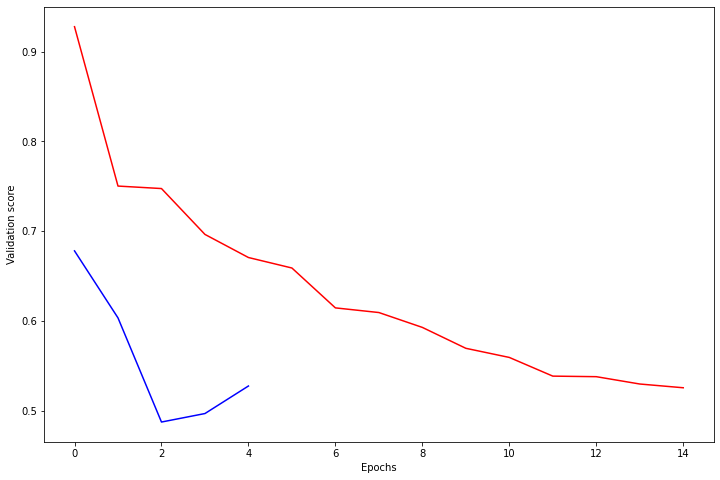

In [15]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.figure(figsize=(12,8))
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


* The blue model is model_2, the red is model_1. model_2 had a lower loss value, so it is the better model.

### Adding layers to a network

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

In [16]:
input_shape=(predictors.shape[1],)
# Create the new model: model_2
model_1 = Sequential()
 
# Add the first and second layers
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
 
# Add the output layer
model_1.add(Dense(2, activation='softmax'))
 
# Compile model_2
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 50)                550       
                                                                 
 dense_24 (Dense)            (None, 2)                 102       
                                                                 
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


**Instructions**

* Specify a model called model_2 that is like model_1, but which has 3 hidden layers of 50 units instead of only 1 hidden layer.
    * Use input_shape to specify the input shape in the first hidden layer.
    * Use 'relu' activation for the 3 hidden layers and 'softmax' for the output layer, which should have 2 units.
* Compile model_2 as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].
Run to fit both the models and visualize which one gives better results! For both models, you should look for the best val_loss and val_acc, which won't be the last epoch for that model.

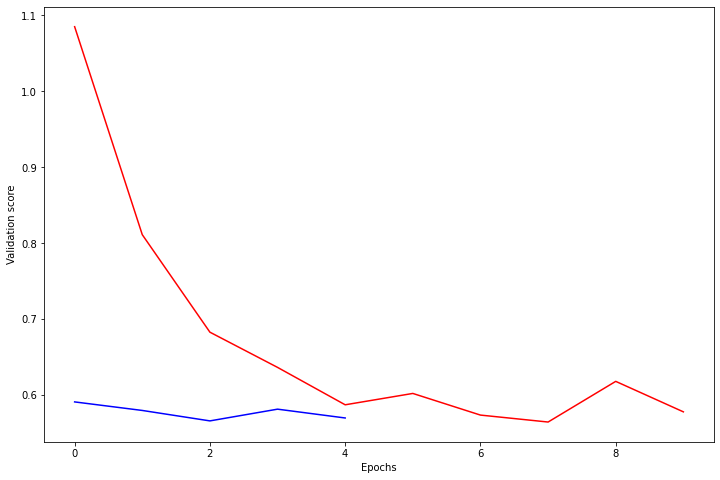

In [17]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 =  Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.figure(figsize=(12,8))
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


* The blue model is Model_2 and the red is model_1. The model with the lower loss value is the better model.

### Thinking about model capacity

"Model capacity" or "network capacity" is closely related to the terms overfitting and underfitting.

**Overfitting**

![Model Capacity](4_0_Model_Capacity.png)

Model capacity is a model's ability to capture predictive patterns in your data. So, the more capacity a model, the further to the right we will be on this graph. If you had a network, and you increased the number of nodes or neurons in a hidden layer, that would increase model capacity. And if you add layers, that increases capacity. Said another way, making larger layers or increasing the number of layers moves you further to the right of this graph.

**Workflow for optimizing model capacity**

![Sequential](4_1_Model_Capacity_Optimization.png)

Let's walk through that process once. Here, I've started a model that has one hidden layer and $100$ units. That's a relatively simple, or low capacity, model. I get a mean squared error of $5.4$. Since I started with a simple model, I now try increasing capacity. I could increase the number of layers or use more hidden nodes. 
* I'll start by using more nodes in the one hidden layer. That improved the model, so I'll keep increasing capacity.
* This time I'll switch to using 2 hidden layers. Each layer has 250 nodes. That improved the error more. 
* So, I try 3 layers, continuing to add capacity as long as it helps,This hurt the score. So, the model with 2 layers and 250 nodes is about perfect. I'll try another model that reduces capacity slightly from the last model I built.
* That is 3 hidden layers with 200 nodes each. That seems the best model yet. So I'll stick with that. Should you change capacity by adding layers or by adding nodes to an existing layer? There isn't a universal answer to that. You can experiment. But you should generally be thinking about whether you are trying to increase or decrease capacity, ideally honing in on the right capacity by looking at validation scores.


### Experimenting with model structures

You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.

## Stepping up to images

Using MNIST dataset. Your model will predict which image was written.

### Building your own digit recognition model

You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from Keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a [blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws) by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

Ready to take your deep learning to the next level? Check out [Advanced Deep Learning with Keras](https://app.datacamp.com/learn/courses/advanced-deep-learning-with-keras) to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at [Image Processing with Keras in Python](https://app.datacamp.com/learn/courses/image-processing-with-keras-in-python) to learn image-specific applications of Keras.

In [18]:
data=pd.read_csv("mnist.csv")
data.shape

(2000, 785)

In [19]:
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
X=data.drop(['5'],axis=1).astype(np.float32).to_numpy()
y=data['5'].astype(np.float32).to_numpy()
y=to_categorical(data['5'])

In [24]:
print("Predictors shape: ",X.shape)
print("Target shape: ",y.shape)

Predictors shape:  (2000, 784)
Target shape:  (2000, 10)


In [25]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50,activation='relu',input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50,activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X,y,validation_split=0.3,epochs=10)

Epoch 1/10
44/44 [==============================] - 4s 21ms/step - loss: 21.8260 - accuracy: 0.3700 - val_loss: 6.8355 - val_accuracy: 0.5367
Epoch 2/10
44/44 [==============================] - 0s 7ms/step - loss: 4.0669 - accuracy: 0.6529 - val_loss: 4.4896 - val_accuracy: 0.6133
Epoch 3/10
44/44 [==============================] - 0s 7ms/step - loss: 2.0650 - accuracy: 0.7593 - val_loss: 3.6885 - val_accuracy: 0.6700
Epoch 4/10
44/44 [==============================] - 0s 7ms/step - loss: 1.3050 - accuracy: 0.8143 - val_loss: 3.5145 - val_accuracy: 0.6600
Epoch 5/10
44/44 [==============================] - 0s 7ms/step - loss: 0.8603 - accuracy: 0.8471 - val_loss: 3.0664 - val_accuracy: 0.7317
Epoch 6/10
44/44 [==============================] - 0s 7ms/step - loss: 0.5377 - accuracy: 0.8814 - val_loss: 3.2891 - val_accuracy: 0.7267
Epoch 7/10
44/44 [==============================] - 0s 7ms/step - loss: 0.3757 - accuracy: 0.9150 - val_loss: 3.0680 - val_accuracy: 0.7317
Epoch 8/10
44/44 [

* You should see better than 90% accuracy recognizing handwritten digits, even while using a small training set of only 2000 images!